# CO653

### Add all the important imports 

##### And anything else that is important

In [230]:
#Imports
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import cv2
import os

# Changes the directory
os.chdir('C:\\Users\\ejink\\OneDrive\\Desktop\\uni\\Y3\\3-Machine\\Code\\images')

# The Actual AI

### Add the MNIST dataset (single handwritten numbers (0-9)) and save some important values that will be used later

In [231]:
#Important values
num_classes = 10
input_shape = (28, 28, 1)

#The Dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

### Prepare MNIST dataset for the training 

In [232]:
# Scale the images to the range between 0 and 1
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images has the shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Create the model used for the training

In [233]:
model = keras.Sequential([
keras.Input(shape=input_shape),
layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
layers.MaxPooling2D(pool_size=(2, 2)),
layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
layers.MaxPooling2D(pool_size=(2, 2)),
layers.Flatten(),
layers.Dense(64, activation='relu'),
layers.Dense(num_classes, activation="softmax"),
])
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

### Train the model using the MNIST dataset

In [234]:
epochs = 7
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.001,), metrics=["accuracy"])
model.fit(x_train, y_train, epochs=epochs)

Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8937 - loss: 0.3315
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9855 - loss: 0.0487
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9891 - loss: 0.0310
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9924 - loss: 0.0229
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9949 - loss: 0.0161
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9966 - loss: 0.0114
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9971 - loss: 0.0100


### Evaluating the model
The Testing

In [235]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy:", score[1])

Test accuracy: 0.991599977016449


# Onto the actual use of the model

### Gets the Images Ready (find and greyscale them) For Use at Predicting What Numbers They Are

In [236]:
image = cv2.imread("image.png",cv2.IMREAD_GRAYSCALE)

### Splits the number into single digits asuming that the image is made up of multiple numbers

In [237]:

# Apply thresholding
_, thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through contours and extract digits
for i, contour in enumerate(contours):
    
    # Get bounding box
    x, y, w, h = cv2.boundingRect(contour)
    
    # Crop digit from original image
    digit = image[y:y+h, x:x+w]
    
    # Save digit as separate images
    cv2.imwrite(f"digit_{i}.png", digit)


### Gets the image into the right shape and then make it an array

In [238]:
# Function to resize image to 28x28 and convert to array
def resize_to_array(image):
    
    # Resize image to 28x28
    resized_image = cv2.resize(image, (28, 28))
    
    # Convert grayscale image to array and get it ready to put into model
    array = np.array(resized_image)
    array = array.astype("float32") / 255 *-1
    array = np.expand_dims(array, -1)
    return array

# Load the split images and resize them
split_images = []
for i in range(10):  
    image = cv2.imread(f"digit_{i}.png",cv2.IMREAD_GRAYSCALE )  
    resized_array = resize_to_array(image)
    split_images.insert(0,resized_array)

# Convert the list of arrays to a numpy array
split_images_array = np.array(split_images)

### Use model to predict

In [239]:
y_prob = model.predict(split_images_array)
y_classes = y_prob.argmax(axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


### Show prediction 
training and evaluation had high scores but this didnt
This is probobaly due to the spliting up of images and then the resizing making the training data diffrent to the data used to make predictions on
Either the training data needs to be changed to similare style, the cropping and resizing needs more fine tuning or the model/training needs to be fine tuned more. 

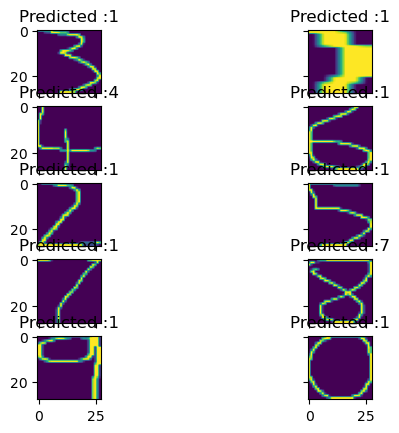

In [240]:
#Visualizing the predicted vs what it actually was
n = 0
nrows = 5
ncols = 2
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
for row in range(nrows):
    for col in range(ncols):
        ax[row,col].imshow((split_images_array[n]).reshape((28,28)))
        ax[row,col].set_title("Predicted :{}".format(y_classes[n]))
        n += 1